<a href="https://colab.research.google.com/github/Raynould-Joseph/Machine-Learning-/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('/content/sample_data/TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [14]:
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']
 
X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values
 
 
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardSmbcaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Activation, Dense
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6228
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6726
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7753
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7769
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7801
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7865
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7961
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7994
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7994
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8090
Epoch 1/10
63/63 [=

In [20]:
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
###############################################
 
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8138041496276855
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8138041496276855
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8378812074661255
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8523274660110474
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.8089887499809265
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8089887499809265
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.8250401020050049
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8282504081726074
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.7463884353637695
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.8041733503341675
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8250401020050049
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8523274660110474
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.6292135119438171
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8154093027114868
15 Par

  TrialNumber            Parameters  Accuracy
0           4  batch_size5-epoch100  0.852327


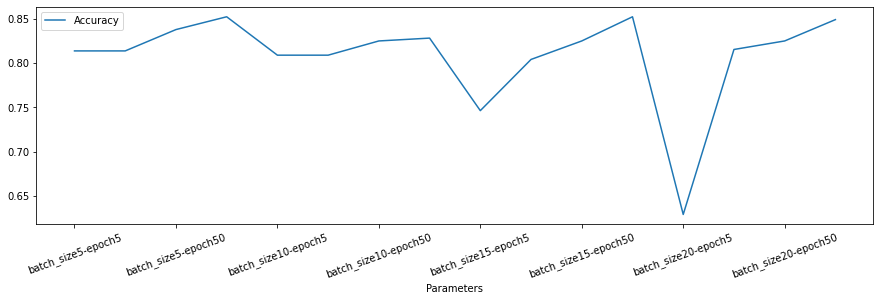

In [21]:
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))
 
# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [22]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.8026
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8122
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8138
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8106
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8090
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8122
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8090
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8186
Epoch 9/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8106
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4524 - accura

In [28]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb &gt; 0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

SyntaxError: ignored